Name      : Dimas Sullistyana<br>
Batch     : 42<br>
ID peserta: PYTN042ONL002


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

### IMPORT DATA

In [2]:
df_bank_additional_full = pd.read_csv("dataset/bank-additional/bank-additional-full.csv", sep=";")
df_bank_full = pd.read_csv("dataset/bank/bank-full.csv")

view data bank

In [3]:
#Let's view the top 5 rows of the dataset using the head() function.
df_bank_additional_full.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df_bank_additional_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
cat = df_bank_additional_full.loc[:, df_bank_additional_full.dtypes == object]
num = df_bank_additional_full.loc[:, df_bank_additional_full.dtypes != object]

cat = cat.copy()
le = preprocessing.LabelEncoder()

for i in cat:
    i_string = str(i)
    cat[i_string] = le.fit_transform(cat[i_string])

df_bank_additional_full = pd.concat([num, cat], axis=1)
df_bank_additional_full.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,6,1,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,1,0,0,1,6,1,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,2,0,1,6,1,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,1,0,0,0,1,6,1,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,0,2,1,6,1,1,0


In [6]:
#Let's view column bank addtional
df_bank_additional_full.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job',
       'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [7]:
# Saperating features and result vectors
X = df_bank_additional_full.drop('y', axis=1).values
y = df_bank_additional_full['y'].values
print(X.shape, y.shape)

(41188, 20) (41188,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=11
)
print("training size:", X_train.shape[0])
print("test size:", X_test.shape[0])

training size: 32950
test size: 8238


In [10]:
def train_models(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_acc = model.score(X_train, y_train)
    
    test_pred = model.predict(X_test)
    test_acc = model.score(X_test, y_test)
    
    print("-- training perform --")
    print("target: ", y_train)
    print("prediction: ", train_pred)
    print("accuracy score: ", train_acc)
    
    print("-- test preform --")
    print("target : ", y_test)
    print("prediction : ", test_pred)
    print("accuracy score : ", test_acc)
    
    print(classification_report(y_test, test_pred))

# LOGISTIC REGRESSION

In [11]:
logistic = LogisticRegression()
train_models(logistic, X_train, X_test, y_train, y_test)

-- training perform --
target:  [0 0 0 ... 0 0 0]
prediction:  [0 0 0 ... 0 0 0]
accuracy score:  0.9078603945371776
-- test preform --
target :  [0 0 0 ... 0 0 0]
prediction :  [0 0 0 ... 0 0 0]
accuracy score :  0.9107793153678078
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7341
           1       0.65      0.39      0.49       897

    accuracy                           0.91      8238
   macro avg       0.79      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238



C:\Users\Dimas-BG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## K-NEAREST NEIGHBORS

In [11]:
knn = KNeighborsClassifier()
train_models(knn, X_train, X_test, y_train, y_test)

-- training perform --
target:  [0 0 0 ... 0 0 0]
prediction:  [0 0 0 ... 0 1 0]
accuracy score:  0.9301365705614567
-- test preform --
target :  [0 0 0 ... 0 0 0]
prediction :  [1 0 0 ... 0 0 0]
accuracy score :  0.9077445982034474
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7341
           1       0.59      0.49      0.53       897

    accuracy                           0.91      8238
   macro avg       0.77      0.72      0.74      8238
weighted avg       0.90      0.91      0.90      8238



## SUPPORT VECTOR MACHINE

In [17]:
svc = SVC(
    kernel="linear",
)
train_models(svc, X_train, X_test, y_train, y_test)

-- training perform --
target:  [0 0 0 ... 0 0 0]
prediction:  [0 0 0 ... 0 0 0]
accuracy score:  0.8986039453717755
-- test preform --
target :  [0 0 0 ... 0 0 0]
prediction :  [0 0 0 ... 0 0 0]
accuracy score :  0.8998543335761107
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7341
           1       0.55      0.47      0.50       897

    accuracy                           0.90      8238
   macro avg       0.74      0.71      0.72      8238
weighted avg       0.89      0.90      0.90      8238



## DESCISION TREE CLASSIFIER

In [13]:
dtree = DecisionTreeClassifier()
train_models(dtree, X_train, X_test, y_train, y_test)

-- training perform --
target:  [0 0 0 ... 0 0 0]
prediction:  [0 0 0 ... 0 0 0]
accuracy score:  1.0
-- test preform --
target :  [0 0 0 ... 0 0 0]
prediction :  [0 1 0 ... 0 0 0]
accuracy score :  0.8912357368293276
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7341
           1       0.50      0.53      0.52       897

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238



## RANDOM FOREST

In [18]:
forest = RandomForestClassifier(
    n_estimators=100
)
train_models(forest, X_train, X_test, y_train, y_test)

-- training perform --
target:  [0 0 0 ... 0 0 0]
prediction:  [0 0 0 ... 0 0 0]
accuracy score:  0.9999696509863429
-- test preform --
target :  [0 0 0 ... 0 0 0]
prediction :  [0 1 0 ... 0 0 0]
accuracy score :  0.9135712551590192
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7341
           1       0.64      0.48      0.55       897

    accuracy                           0.91      8238
   macro avg       0.79      0.72      0.75      8238
weighted avg       0.91      0.91      0.91      8238



## NAIVE BAYES

In [19]:
bayes = GaussianNB()
train_models(bayes, X_train, X_test, y_train, y_test)

-- training perform --
target:  [0 0 0 ... 0 0 0]
prediction:  [0 0 0 ... 0 0 0]
accuracy score:  0.8467678300455235
-- test preform --
target :  [0 0 0 ... 0 0 0]
prediction :  [1 0 0 ... 0 0 0]
accuracy score :  0.8452294246176256
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      7341
           1       0.37      0.61      0.46       897

    accuracy                           0.85      8238
   macro avg       0.66      0.74      0.69      8238
weighted avg       0.89      0.85      0.86      8238



## VISUALIZATION

see the number of ages in a bank

D:\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


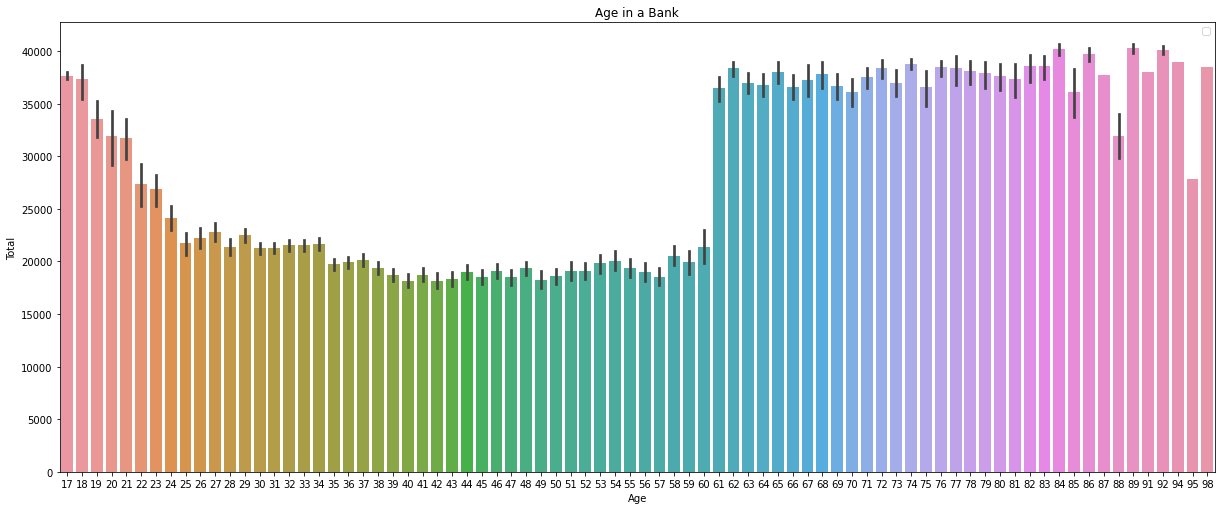

In [35]:
features_imp = df_bank_additional_full['age']
a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(
    features_imp,
    y=features_imp.index,
)
plt.title("Age in a Bank")
plt.xlabel("Age")
plt.ylabel("Total")
plt.legend()
plt.show()